<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/1_modelo_nao_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   agrupar os filmes usando Cluesteriracao, KMeans
2.   List item



o KMeans funciona, passa o numero de cluster, ele joga entao 3 pontos aleatorio chamado de centroids, calcula depois a distancia entre os 3 pontos, pega a metade do camilho e divide os dados dessa metade, recalcula a posição dos centroides os pontos para otimiza a a distancia dos dado realocando o centroides.

assim como redistribuir um hospital por regiao e bairro

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://filosophy.org/writing/visual-algorithms-k-means-clustering/







In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
type(filmes_df)

pandas.core.frame.DataFrame

In [4]:
type(filmes_df.generos)

pandas.core.series.Series

In [5]:
filmes_df.generos.str

In [6]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [7]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [19]:
generos_escalados_ndarray.shape

(9742, 20)

In [0]:
#escalado Toy Story
generos_escalados_ndarray[0]

In [10]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados_ndarray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#imprimir os grupos, pegar os rotulos com labels
print('grupos {}'.format(modelo.labels_))

grupos [0 0 1 ... 1 0 1]


In [12]:
#o f é o format
print(f'grupos {modelo.labels_}')

grupos [0 0 1 ... 1 0 1]


In [13]:
print(generos_df.columns)
#centro de cada grupo
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.13466656  1.11472497  1.93303294  2.11250048  0.15756617
  -0.32477665 -0.19996291 -0.60014413  1.21145499 -0.09492563 -0.2674432
   0.31102141  0.31164845 -0.13783356 -0.27300025  0.1405016  -0.47056597
  -0.16920423 -0.09000487]
 [ 0.03500908 -0.28435571 -0.22058842 -0.25194092 -0.26915471  0.19705234
  -0.1886446   0.12472671  0.16524028 -0.16651482 -0.07756002 -0.16172381
  -0.10640974  0.01808658 -0.18749357  0.18680985 -0.23395403 -0.47804886
   0.07742392  0.04288425]
 [-0.05917995  0.63146025  0.04961895 -0.2308774  -0.26730453 -0.54691618
   0.59937475 -0.21558007 -0.13952314 -0.12377154  0.22960673  0.50905295
   0.12272858 -0.17970247  0.51511786 -0.33443134  0.50659054  1.36530098
  

In [14]:
#transformar em dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.134667,1.114725,1.933033,2.112500,0.157566,-0.324777,-0.199963,-0.600144,1.211455,-0.094926,-0.267443,0.311021,0.311648,-0.137834,-0.273000,0.140502,-0.470566,-0.169204,-0.090005
1,0.035009,-0.284356,-0.220588,-0.251941,-0.269155,0.197052,-0.188645,0.124727,0.165240,-0.166515,-0.077560,-0.161724,-0.106410,0.018087,-0.187494,0.186810,-0.233954,-0.478049,0.077424,0.042884
2,-0.059180,0.631460,0.049619,-0.230877,-0.267305,-0.546916,0.599375,-0.215580,-0.139523,-0.123772,0.229607,0.509053,0.122729,-0.179702,0.515118,-0.334431,0.506591,1.365301,-0.114178,-0.064861


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c59fd54a8>,
      dtype=object)

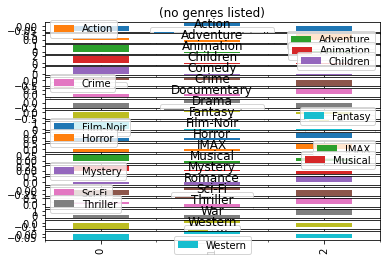

In [15]:
grupos.plot.bar(subplots=True)